In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')

import tensorflow as tf

from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler ,StandardScaler ,Normalizer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

np.set_printoptions(formatter={'all': lambda x: "%.2f" % x})

SMALL_SIZE = 10
MEDIUM_SIZE = 12

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rcParams['figure.dpi']=150

In [2]:
#sdss_df = pd.read_csv('Skyserver_SQL2_27_2018 6_51_39 PM.csv', skiprows=1)
sdss_df = pd.read_csv('Datasets/Skyserver_SQL2_27_2018 6_51_39 PM.csv', skiprows=0)

In [3]:
sdss_df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
sdss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [5]:
sdss_df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [6]:
#np.unique(sdss_df['class'], return_counts=True)

In [7]:
sdss_df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

#  Remove the columns that we dont need

In [8]:
#sdss_df.columns.values

There is no need to know everything about stars, galaxy or quasars - yet we can already tell which features are unlikely to be related to the target variable 'class'.

objid and specobjid are just identifiers for accessing the rows back when they were stored in the original databank. Therefore we will not need them for classification as they are not related to the outcome.

Even more: The features 'run', 'rerun', 'camcol' and 'field' are values which describe parts of the camera at the moment when making the observation, e.g. 'run' represents the corresponding scan which captured the oject.

Source: http://www.sdss3.org/dr9/imaging/imaging_basics.php

We will drop these columns as any correlation to the outcome would be coincidentally.

In [9]:
sdss_df.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid'], axis=1, inplace=True)
sdss_df.head(1)

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.0424,15.94699,15.50342,15.22531,STAR,-0.000009,3306,54922,491


C:\Users\Kian\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


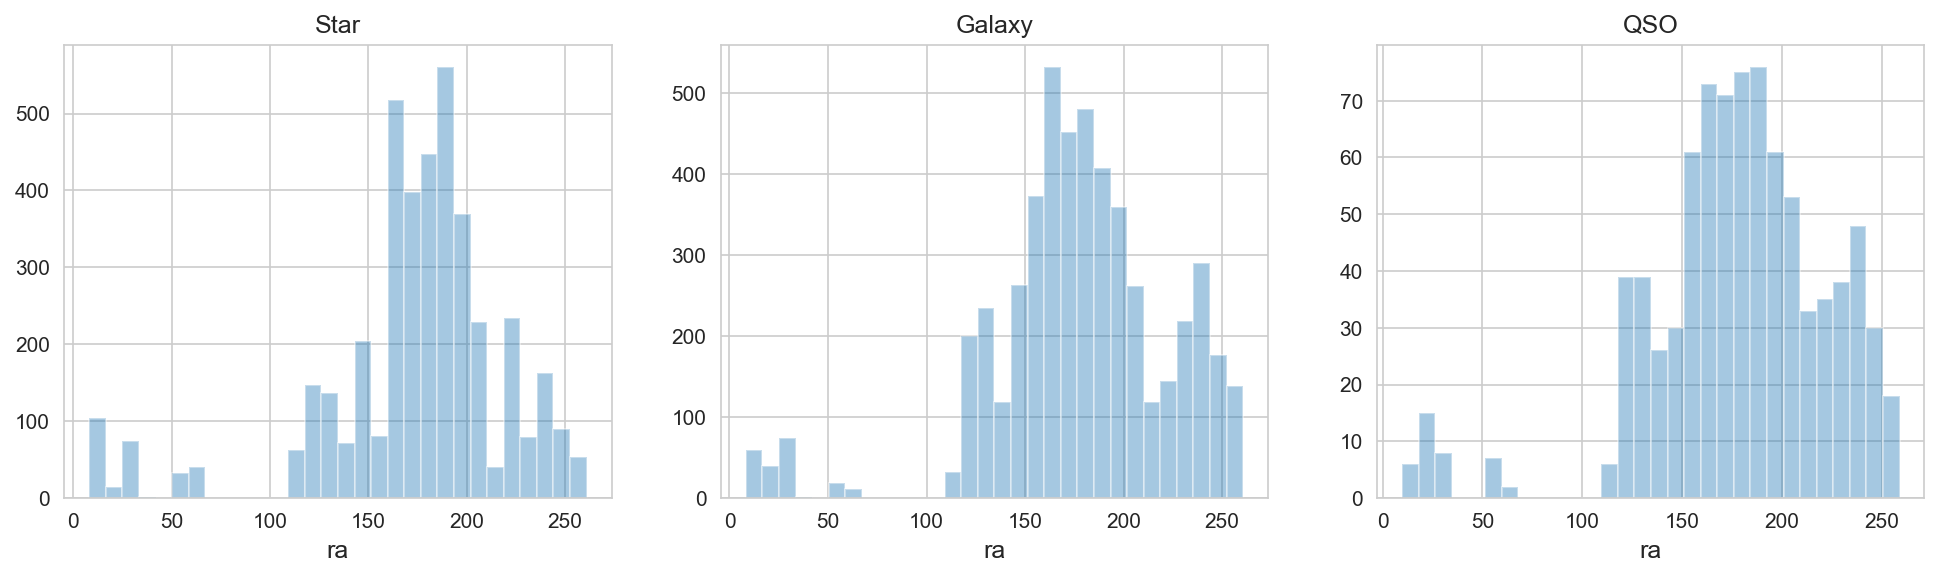

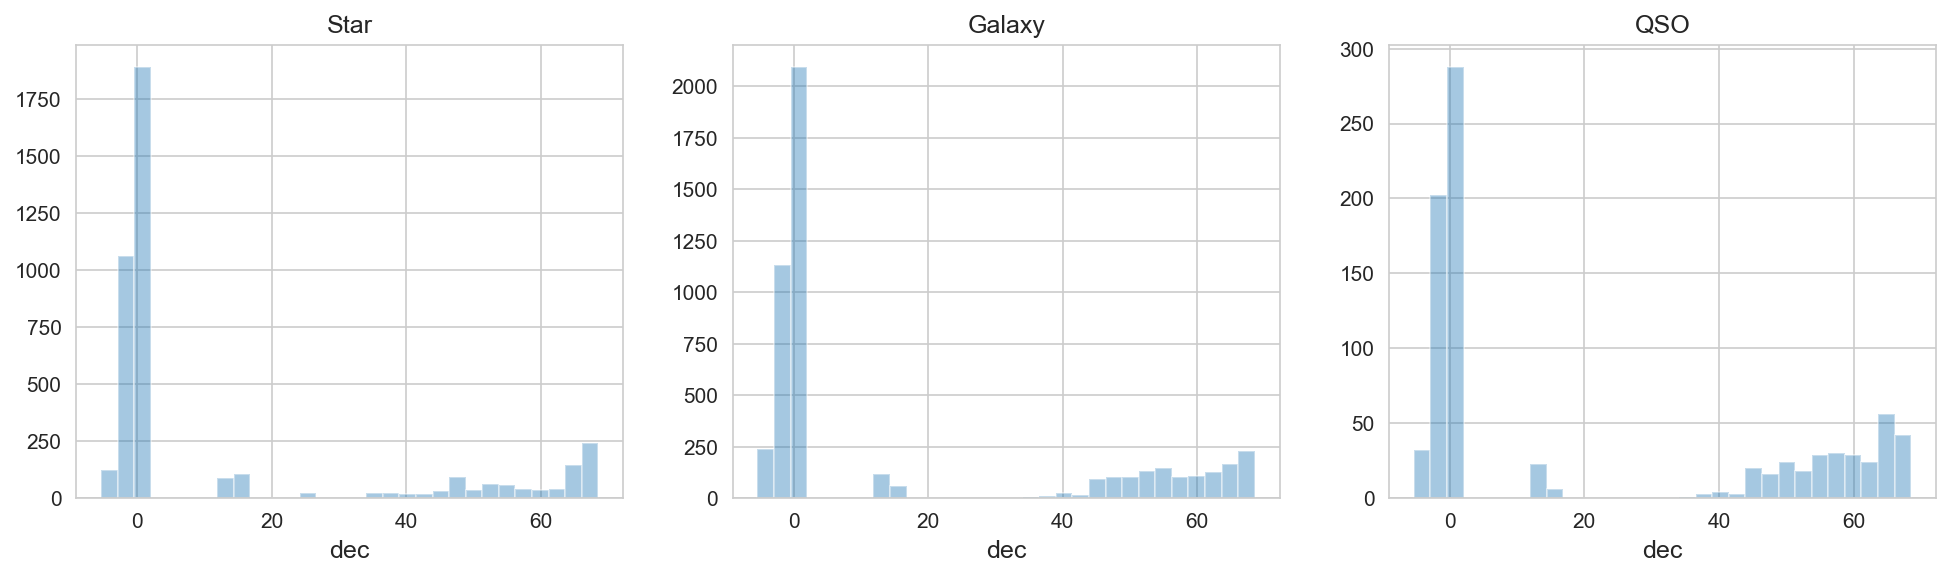

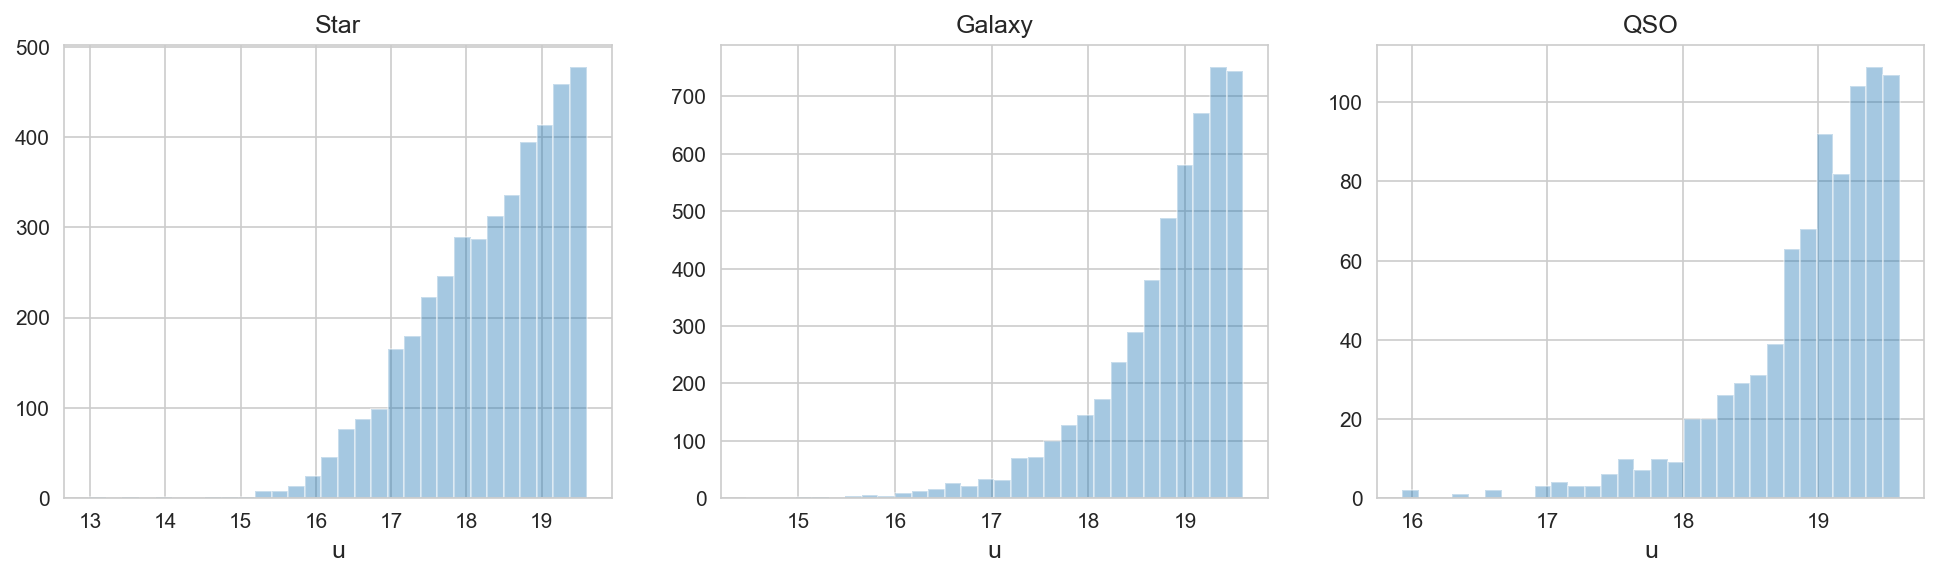

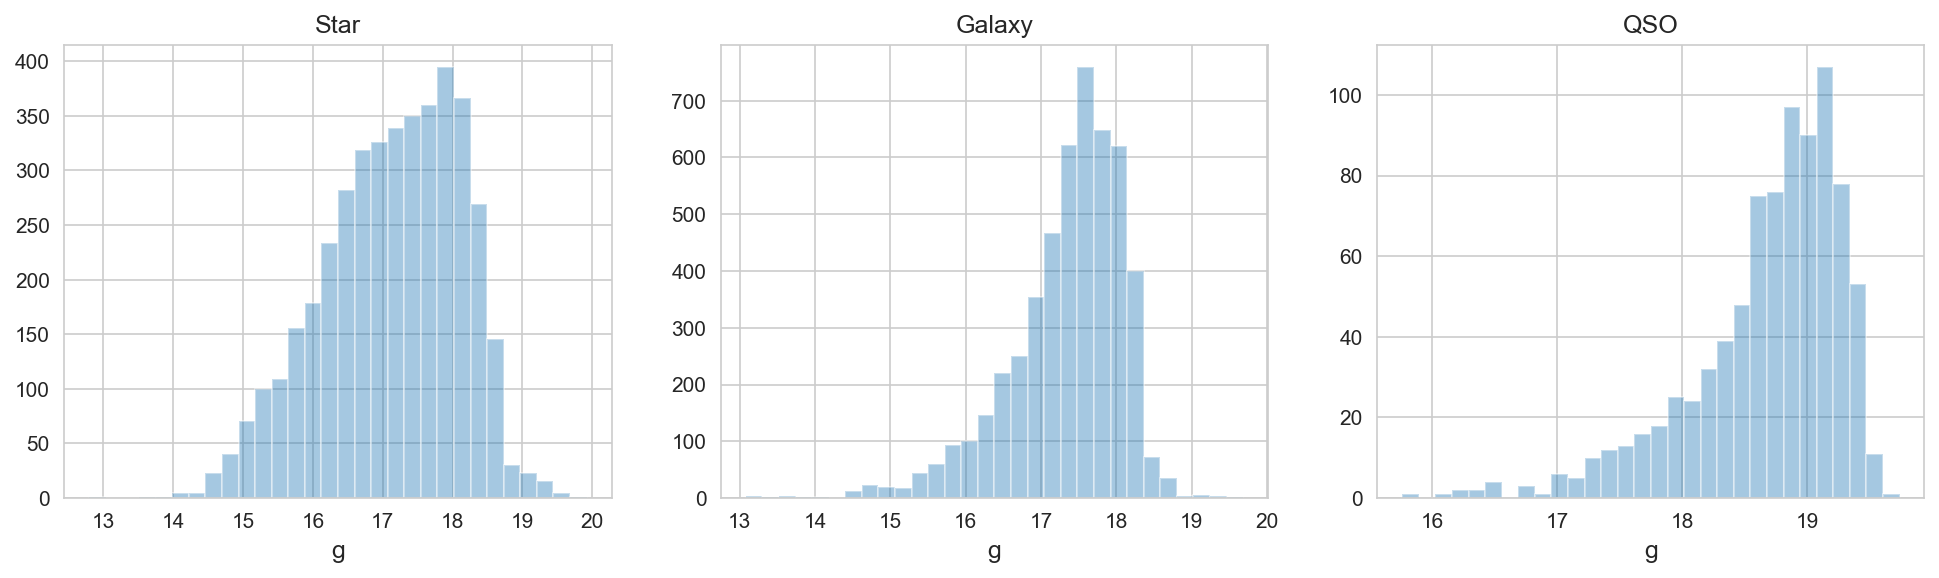

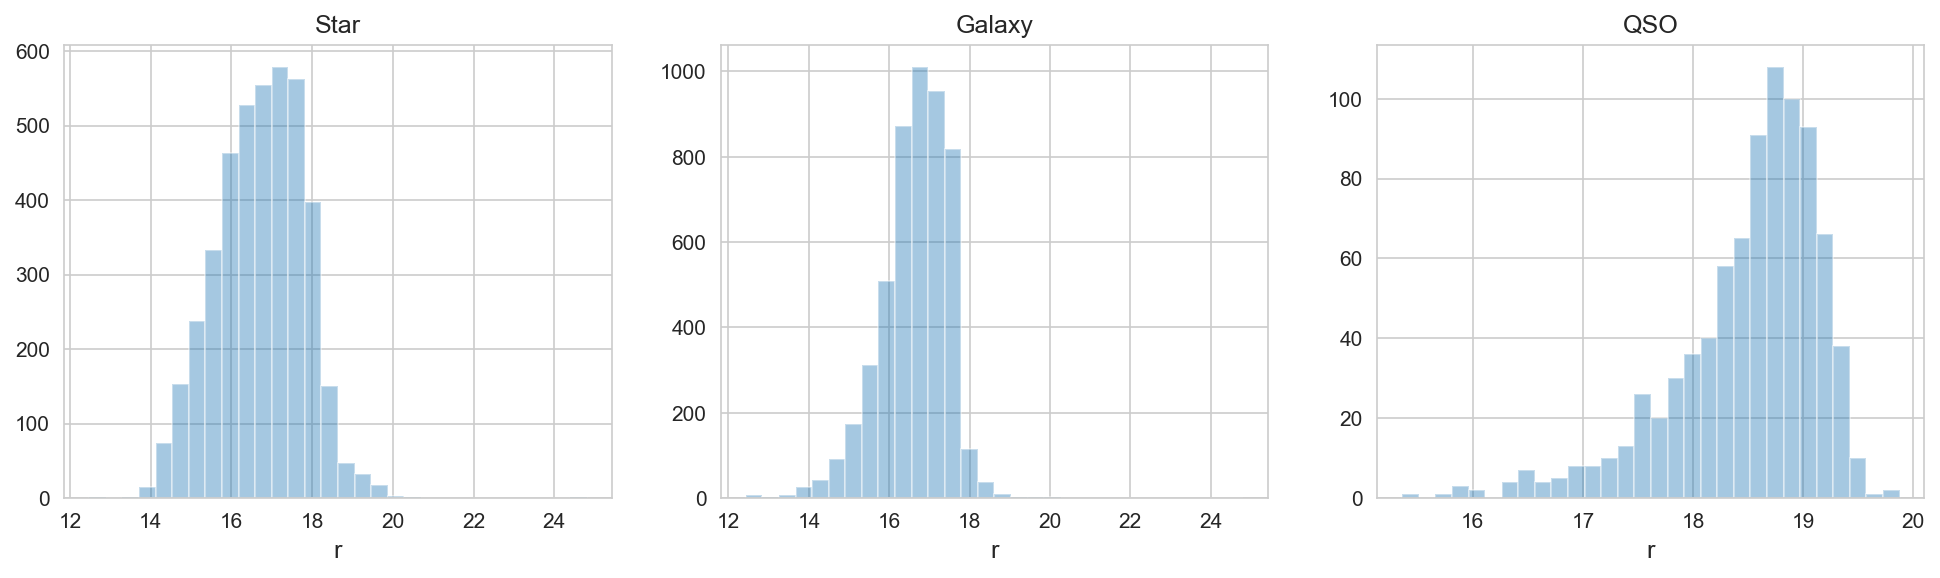

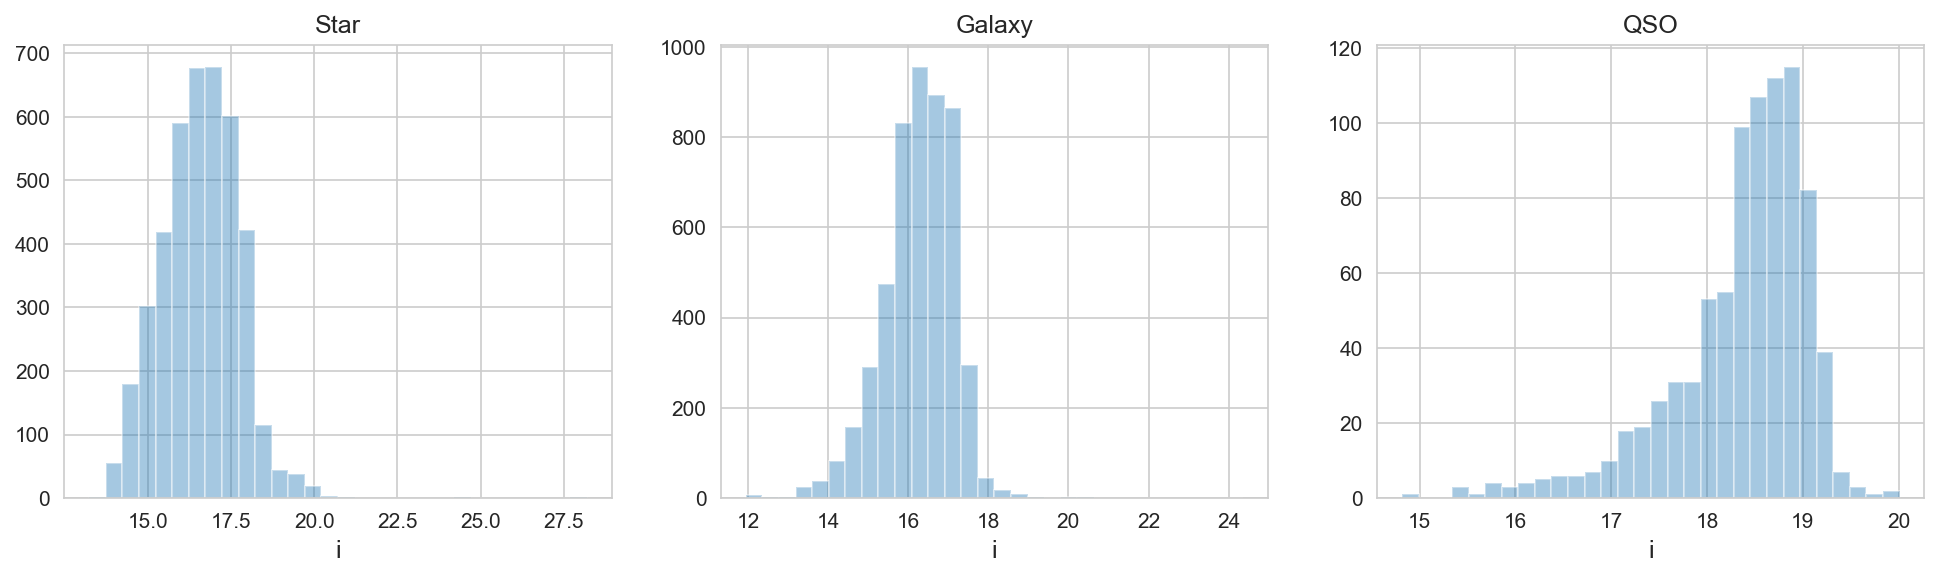

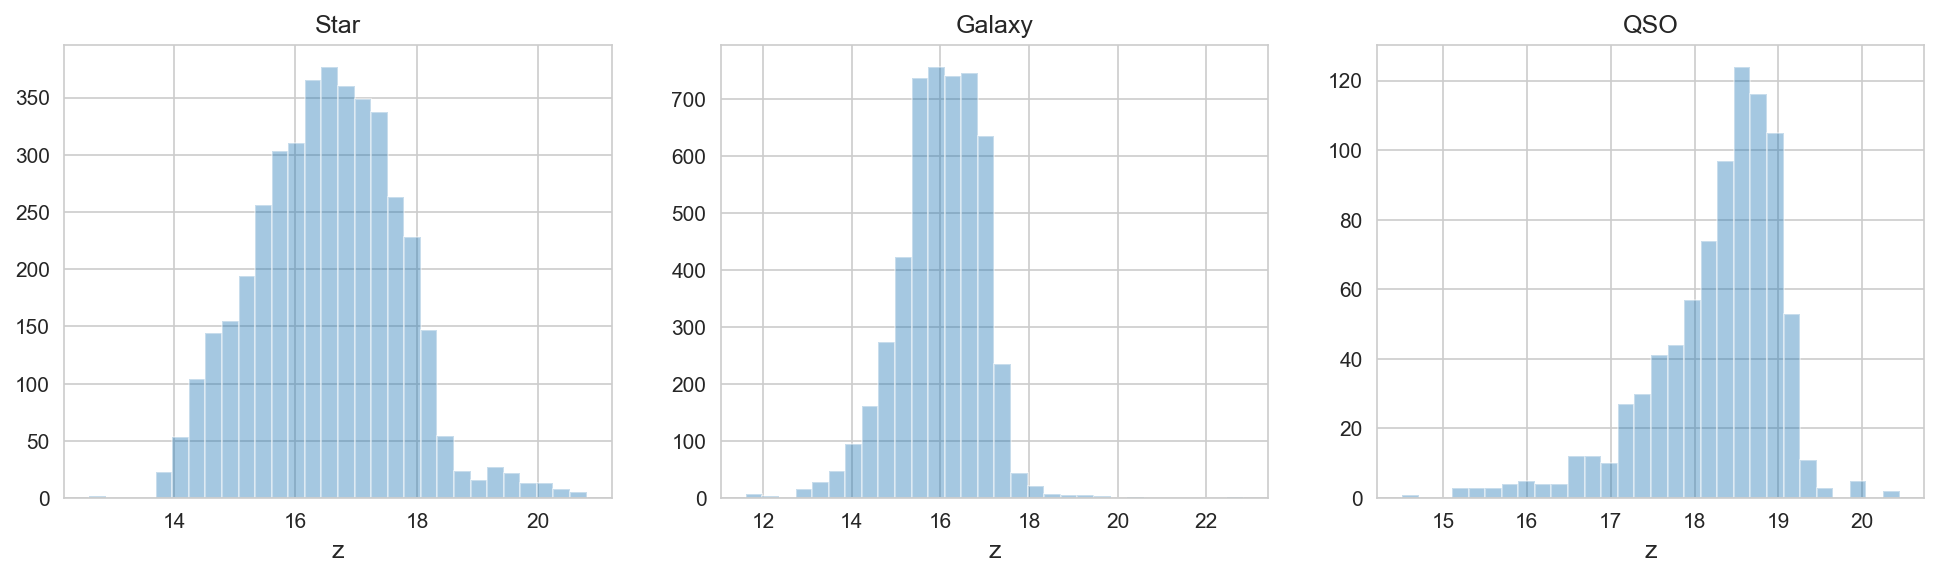

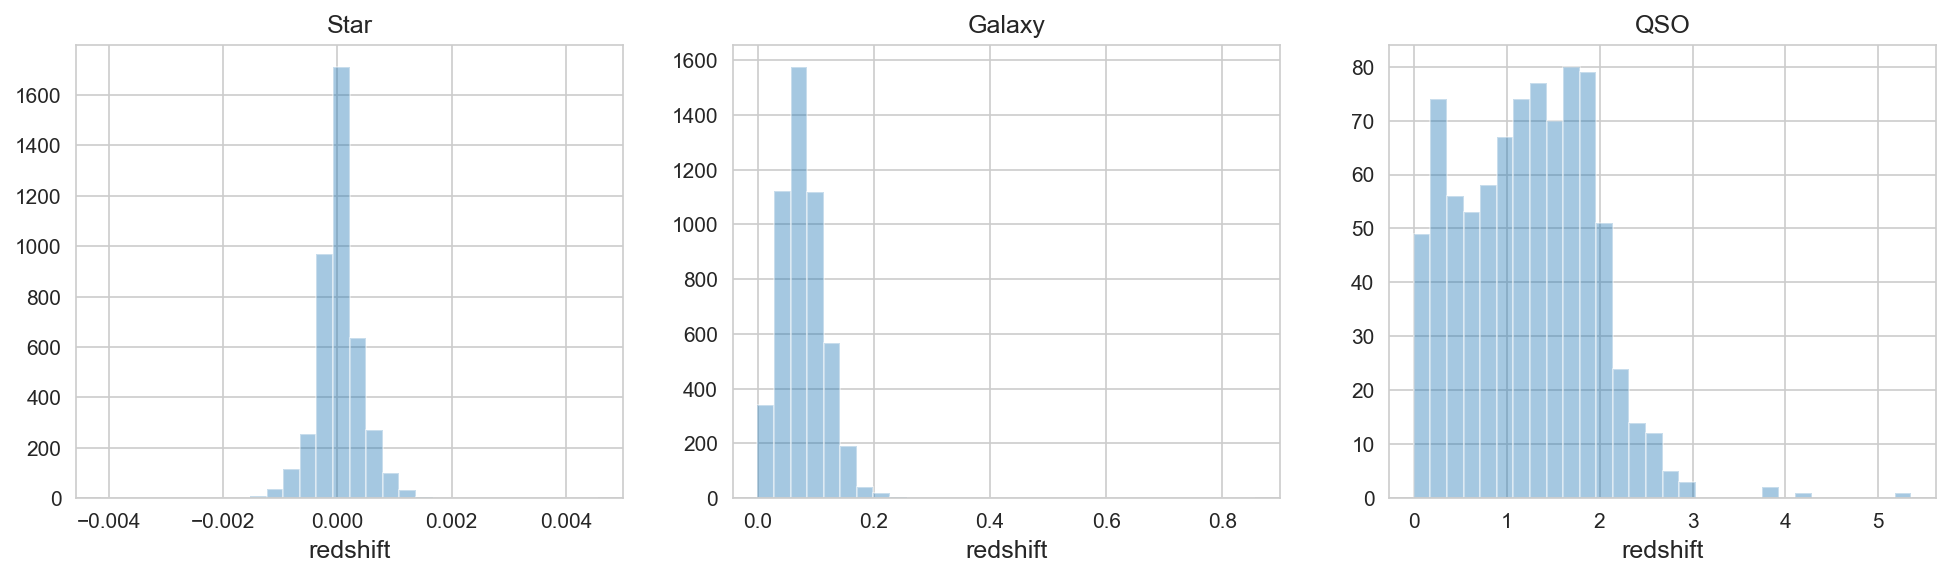

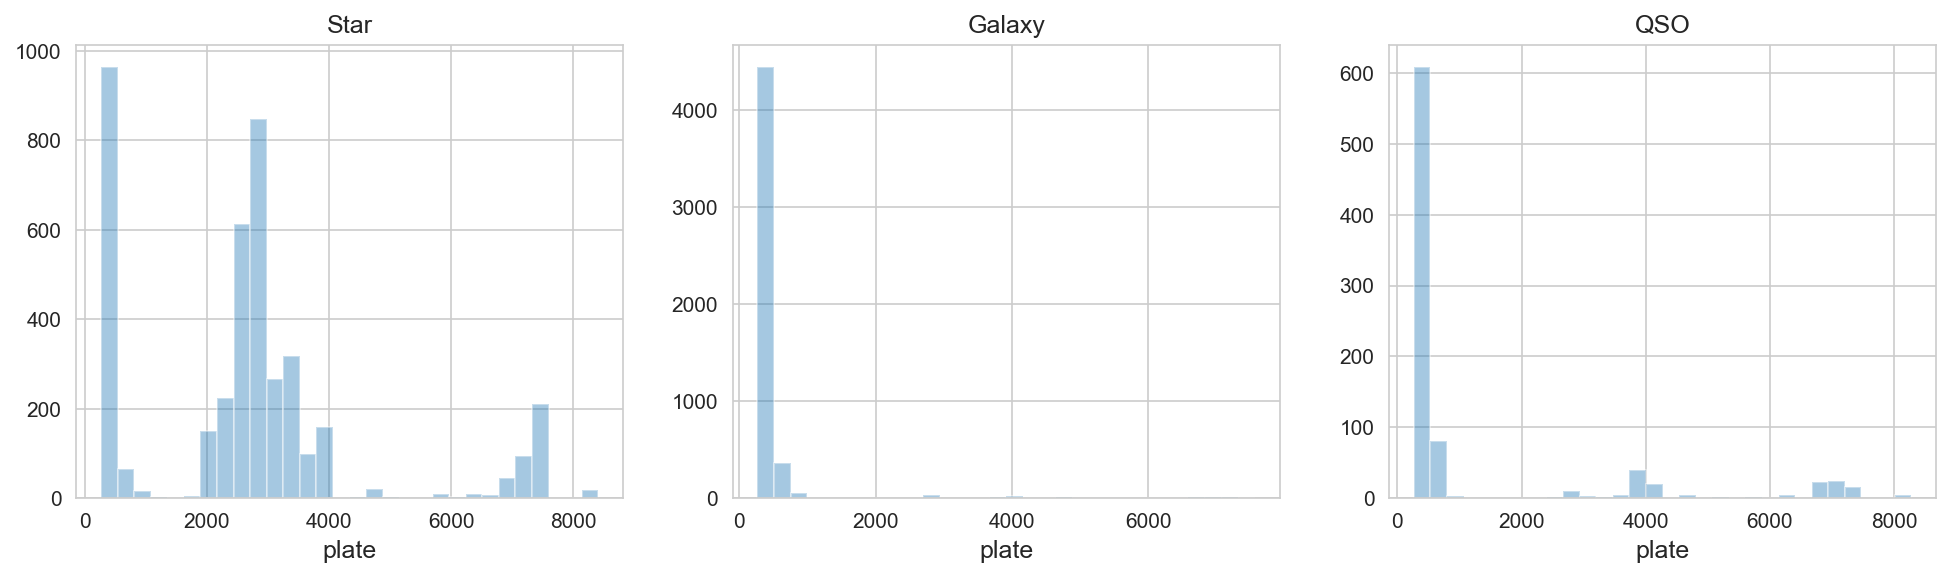

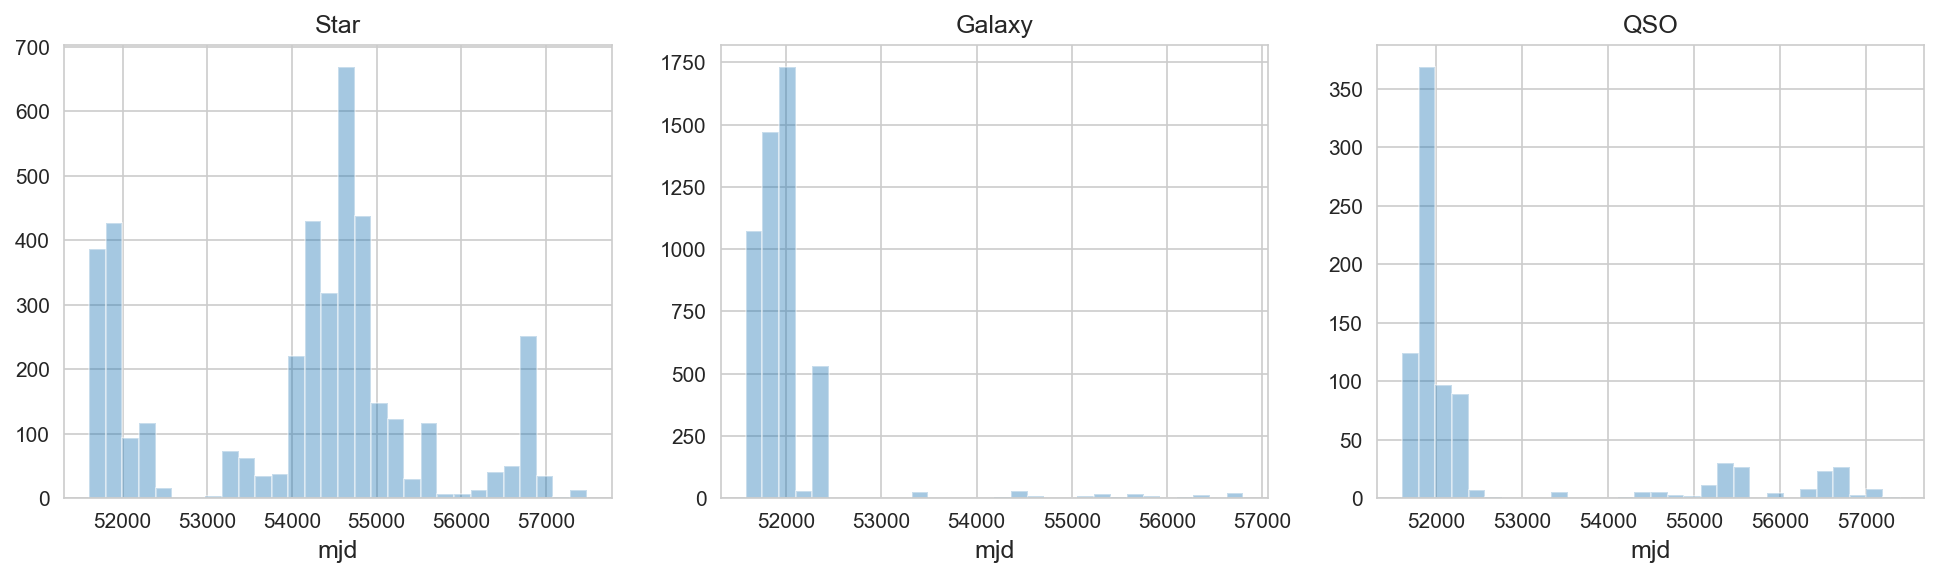

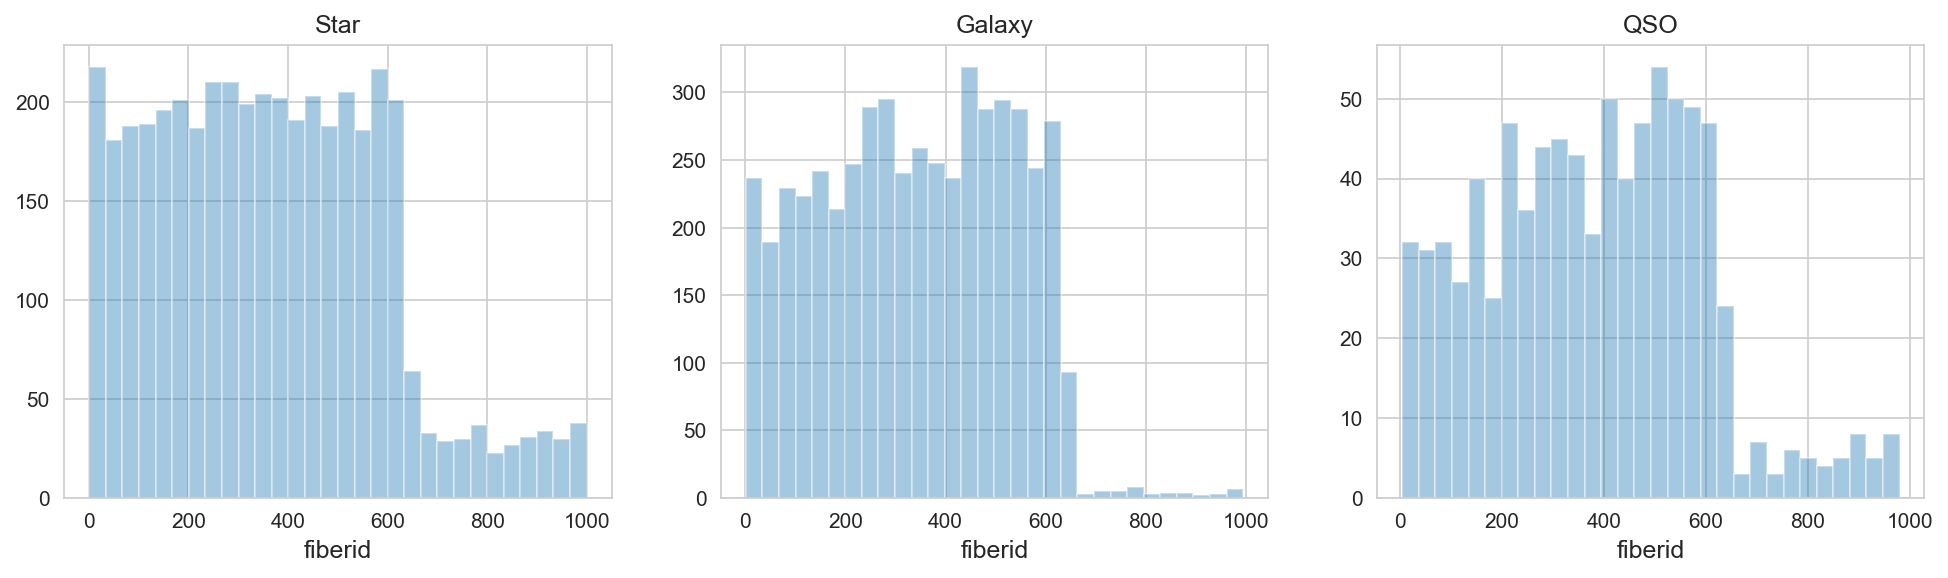

In [10]:
culomns = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift', 'plate', 'mjd', 'fiberid']
for i , culomn in enumerate(culomns):

    fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
    ax = sns.distplot(sdss_df[sdss_df['class']=='STAR'][culomn], bins = 30, ax = axes[0], kde = False)
    ax.set_title('Star')
    ax = sns.distplot(sdss_df[sdss_df['class']=='GALAXY'][culomn], bins = 30, ax = axes[1], kde = False)
    ax.set_title('Galaxy')
    ax = sns.distplot(sdss_df[sdss_df['class']=='QSO'][culomn], bins = 30, ax = axes[2], kde = False)
    ax = ax.set_title('QSO')

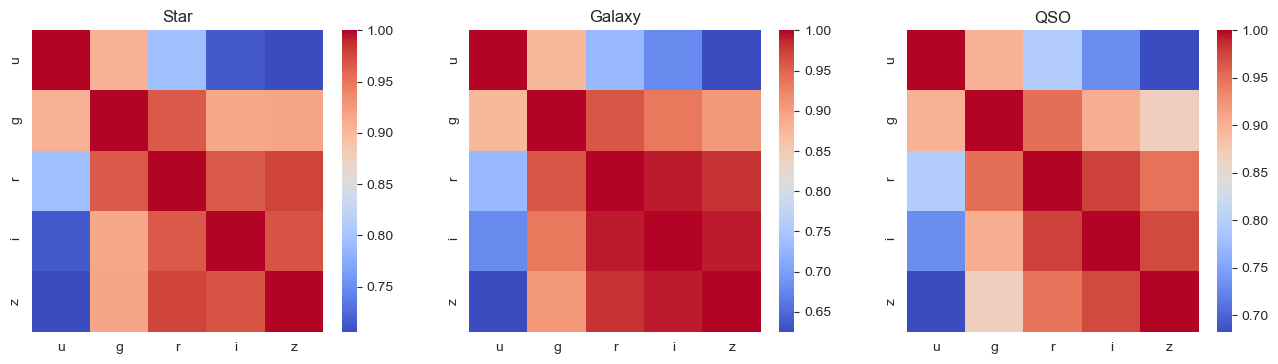

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(sdss_df[sdss_df['class']=='STAR'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Star')
ax = sns.heatmap(sdss_df[sdss_df['class']=='GALAXY'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Galaxy')
ax = sns.heatmap(sdss_df[sdss_df['class']=='QSO'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[2], cmap='coolwarm')
ax = ax.set_title('QSO')

Right of the top we observe that the correlation matrices look very similiar for every class.

We can tell that there are high correlations between the different bands. This feels not really suprising - intuitively one would think that if one of the bands captures some object, the other bands should capture something aswell.

Therefore it is interesting to see that band 'u' is less correlated to the other bands.

Remember: u, g, r, i, z capture light at wavelengths of 354, 476, 628, 769 and 925 nm.

This might indicates that galaxies, stars and quasar objects shine brighter at wavelengths from 476 - 925 nm. Don't quote me on that though.

But: as we can see - the correlation is roughly the same for every class...the different bands behave the same for the different classes!

## Right ascension (ra) and declination (dec)
We will now plot the right ascension versus the declination depending on the class

C:\Users\Kian\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Equatorial coordinates')

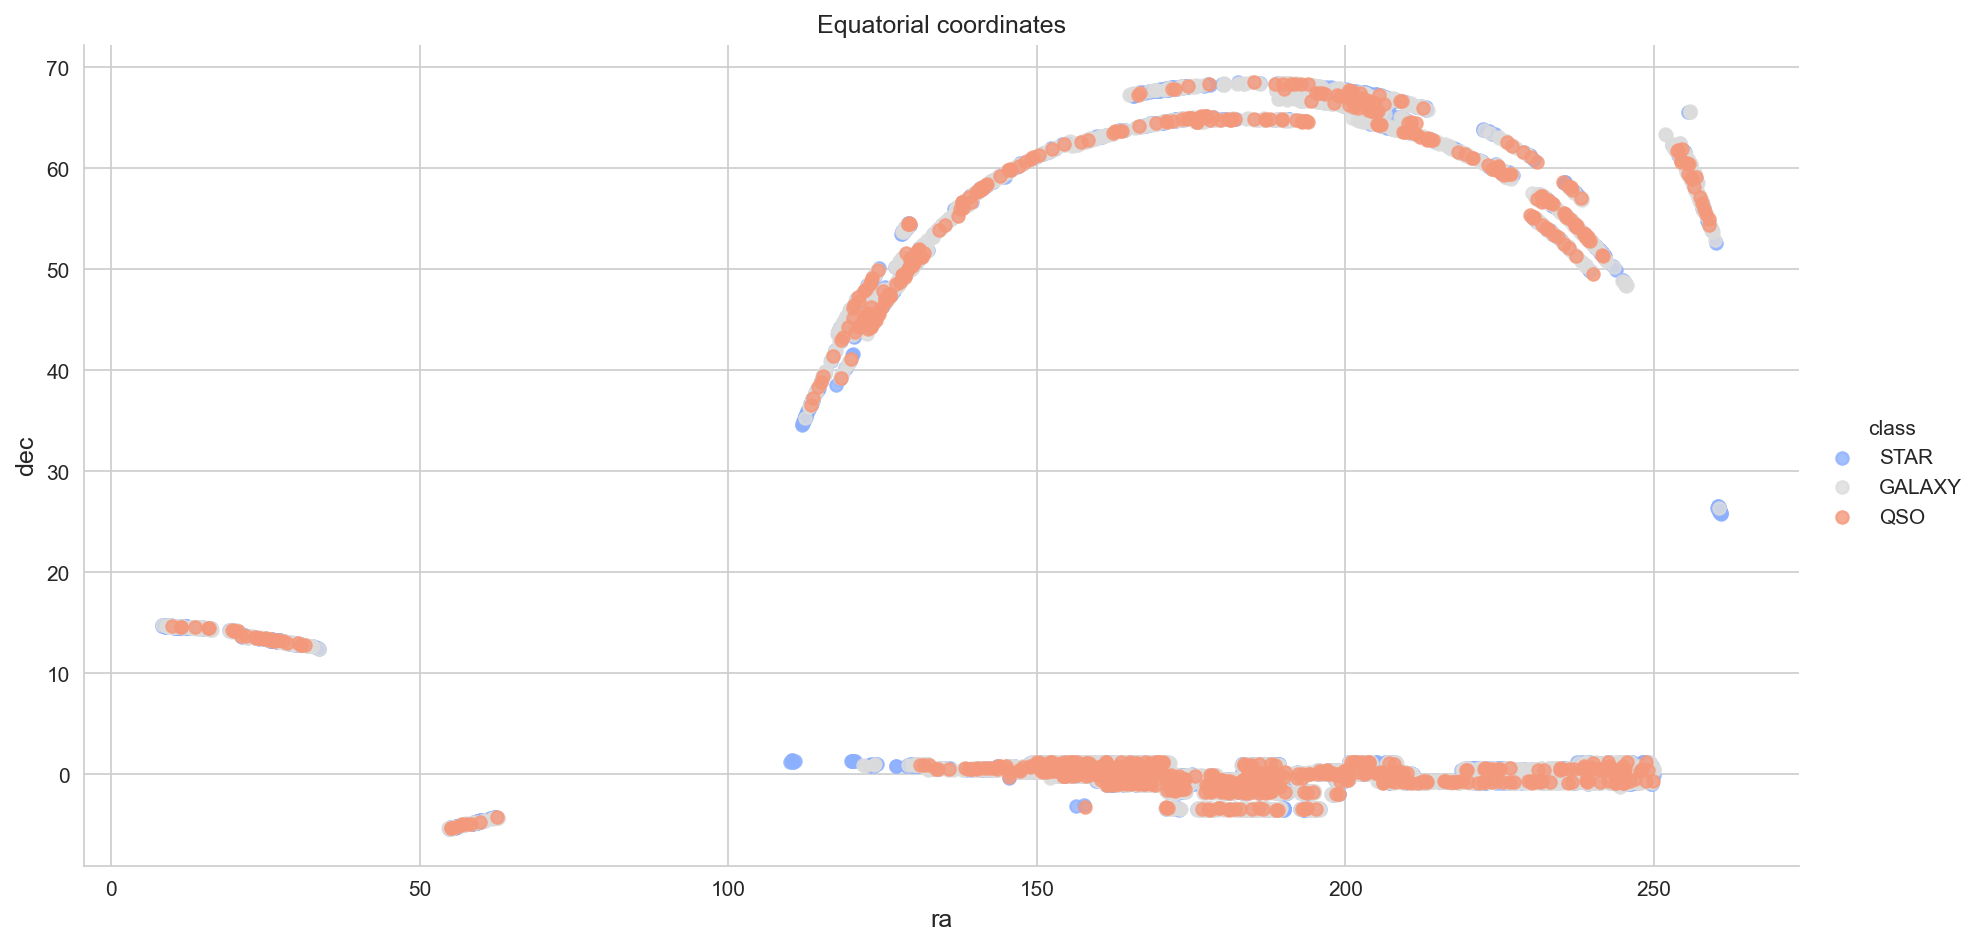

In [12]:
sns.lmplot(x='ra', y='dec', data=sdss_df, hue='class', fit_reg=False, palette='coolwarm', size=6, aspect=2)
plt.title('Equatorial coordinates')

As we can clearly observe the equatorial coordinates do not differ significantly between the 3 classes. There are some outliers for stars and galaxies but for the bigger part the coordinates are within the same range.

Why is that?

All SDSS images cover the same area of the sky. The plot above tells us that stars, galaxies and quasars are observed equally at all coordinates within this area. So whereever the SDSS "looks" - the chance of observing a star or galaxy or quasar is always the same.

### This contradicts our interpretation of the letter value plot of dec from the univariate analysis


## Feature Engineering
u, g, r, i, z

We will now reduce the amount of dimensions by replacing the different bands 'u', 'g', 'r', 'i' and 'z' by a linear combination with only 3 dimensions using Principal Component Analysis.

Principal Component Analysis:

n observations with p features can be interpreted as n points in a p-dimensional space. PCA aims to project this space into a q-dimensional subspace (with q<p) with as little information loss as possible.

It does so by finding the q directions in which the n points vary the most (--> the principal components). It then projects the original data points into the q-dimensional subspace. PCA returns a n x q dimensional matrix.

Using PCA on our data will decrease the amount of operations during training and testing.

In [13]:
sdss_df_fe = sdss_df

# encode class labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(sdss_df_fe['class'])
sdss_df_fe['class'] = y_encoded

# Principal Component Analysis
pca = PCA(n_components=3)
ugriz = pca.fit_transform(sdss_df_fe[['u', 'g', 'r', 'i', 'z']])


# update dataframe 
sdss_df_fe = pd.concat((sdss_df_fe, pd.DataFrame(ugriz)), axis=1)
sdss_df_fe.rename({0: 'PCA_1', 1: 'PCA_2', 2: 'PCA_3'}, axis=1, inplace = True)
sdss_df_fe.drop(['u', 'g', 'r', 'i', 'z'], axis=1, inplace=True)
sdss_df_fe.head()

,ra,dec,class,redshift,plate,mjd,fiberid,PCA_1,PCA_2,PCA_3
0,183.531326,0.089693,2,-0.000009,3306,54922,491,-1.507202,-1.377293,-0.265119
1,183.598370,0.135285,2,-0.000055,323,51615,541,-0.195758,-0.028410,-0.155695
2,183.680207,0.126185,0,0.123111,287,52023,513,1.297604,-0.590023,0.140338
3,183.870529,0.049911,2,-0.000111,3306,54922,510,-1.446117,0.566685,-0.009272
4,183.883288,0.102557,2,0.000590,3306,54922,512,-0.849271,1.287505,-0.397689


### Machine Learning Models - Training


Feature Scaling

We will now train different models on this dataset.

Scaling all values to be within the (0, 1) interval will reduce the distortion due to exceptionally high values and make some algorithms converge faster.

In [14]:
scaler_minmax = MinMaxScaler()
sdss_minmax = scaler_minmax.fit_transform(sdss_df_fe.drop('class', axis=1))

X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(sdss_minmax, sdss_df_fe['class'], test_size=0.33, 
                                                    stratify=sdss_df_fe['class'], random_state=2)

In [15]:
scaler_standar = StandardScaler()
sdss_standar = scaler_standar.fit_transform(sdss_df_fe.drop('class', axis=1))

X_train_standar, X_test_standar, y_train_standar, y_test_standar = train_test_split(sdss_standar, sdss_df_fe['class'], test_size=0.33, 
                                                    stratify=sdss_df_fe['class'], random_state=2)

In [16]:
scaler_normalizer = Normalizer()
sdss_normalizer = scaler_normalizer.fit_transform(sdss_df_fe.drop('class', axis=1))

X_train_normalizer, X_test_normalizer, y_train_normalizer, y_test_normalizer = train_test_split(sdss_normalizer, sdss_df_fe['class'], test_size=0.33, 
                                                    stratify=sdss_df_fe['class'], random_state=2)

#### K Nearest Neighbors

In [17]:
trainX = [X_train_minmax, X_train_standar, X_train_normalizer]
testX = [X_test_minmax, X_test_standar, X_test_normalizer]
trainy = [y_train_minmax, y_train_standar, y_train_normalizer]
testy = [y_test_minmax, y_test_standar, y_test_normalizer]
scaler = [ 'MinMaxScaler', 'StandardScaler', 'Normalizer']

all_acc_knn = []

for i in range(len(trainX)):
    knn = KNeighborsClassifier()
    training_start = time.perf_counter()
    knn.fit(trainX[i], trainy[i])
    training_end = time.perf_counter()
    prediction_start = time.perf_counter()
    preds = knn.predict(testX[i])
    prediction_end = time.perf_counter()
    acc_knn = (preds == testy[i]).sum().astype(float) / len(preds)*100
    knn_train_time = training_end-training_start
    knn_prediction_time = prediction_end-prediction_start
    all_acc_knn.append(acc_knn)

    
    print(scaler[i],': ')
    print()
    print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
    print("Time consumed for training: %4.3f seconds" % (knn_train_time))
    print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))
    print()

MinMaxScaler : 

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 93.12
Time consumed for training: 0.012 seconds
Time consumed for prediction: 0.11866 seconds

StandardScaler : 

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 95.52
Time consumed for training: 0.009 seconds
Time consumed for prediction: 0.14293 seconds

Normalizer : 

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 78.33
Time consumed for training: 0.009 seconds
Time consumed for prediction: 0.07416 seconds



### Naive Bayes

Naive Bayes assumes the data to be normally distributed which can be achieved by scaling using the MaxAbsScaler. 

In [18]:
from sklearn.preprocessing import MaxAbsScaler
scaler_gnb = MaxAbsScaler()
sdss = scaler_gnb.fit_transform(sdss_df_fe.drop('class', axis=1))
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(sdss, sdss_df_fe['class'], test_size=0.33,
                                                                    stratify=sdss_df_fe['class'], random_state=2)

gnb = GaussianNB()
training_start = time.perf_counter()
gnb.fit(X_train_gnb, y_train_gnb)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = gnb.predict(X_test_gnb)
prediction_end = time.perf_counter()
acc_gnb = (preds == y_test_gnb).sum().astype(float) / len(preds)*100
gnb_train_time = training_end-training_start
gnb_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnb))
print("Time consumed for training: %4.3f seconds" % (gnb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (gnb_prediction_time))

Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: 97.79
Time consumed for training: 0.002 seconds
Time consumed for prediction: 0.00086 seconds


### XGBoost

In [19]:
trainX = [X_train_minmax, X_train_standar, X_train_normalizer]
testX = [X_test_minmax, X_test_standar, X_test_normalizer]
trainy = [y_train_minmax, y_train_standar, y_train_normalizer]
testy = [y_test_minmax, y_test_standar, y_test_normalizer]
scaler = [ 'MinMaxScaler', 'StandardScaler', 'Normalizer']

all_acc_xgb = []

for i in range( len(trainX)):
    xgb = XGBClassifier(n_estimators=100, use_label_encoder=False)
    training_start = time.perf_counter()
    xgb.fit(trainX[i], trainy[i])

    training_end = time.perf_counter()
    prediction_start = time.perf_counter()

    preds = xgb.predict(testX[i])

    prediction_end = time.perf_counter()
    acc_xgb = (preds == testy[i]).sum().astype(float) / len(preds)*100
    xgb_train_time = training_end-training_start
    xgb_prediction_time = prediction_end-prediction_start
    all_acc_xgb.append(acc_xgb)


 
    print()
    print(scaler[i],': ')
    print()
    print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
    print("Time consumed for training: %4.3f" % (xgb_train_time))
    print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))


[16:01:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

MinMaxScaler : 

XGBoost's prediction accuracy is: 99.42
Time consumed for training: 0.336
Time consumed for prediction: 0.00194 seconds
[16:01:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

StandardScaler : 

XGBoost's prediction accuracy is: 99.42
Time consumed for training: 0.339
Time consumed for prediction: 0.00184 seconds
[16:01:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you

### Scitkit-Learn's Random Forest Classifier

In [20]:
trainX = [X_train_minmax, X_train_standar, X_train_normalizer]
testX = [X_test_minmax, X_test_standar, X_test_normalizer]
trainy = [y_train_minmax, y_train_standar, y_train_normalizer]
testy = [y_test_minmax, y_test_standar, y_test_normalizer]
scaler = [ 'MinMaxScaler', 'StandardScaler', 'Normalizer']

all_acc_rfc = []


for i in range(len(trainX)):

    rfc = RandomForestClassifier(n_estimators=250, min_samples_split=12, min_samples_leaf=1)
    training_start = time.perf_counter()
    rfc.fit(trainX[i], trainy[i])

    training_end = time.perf_counter()
    prediction_start = time.perf_counter()

    preds = rfc.predict(testX[i])

    prediction_end = time.perf_counter()

    acc_rfc = (preds == testy[i]).sum().astype(float) / len(preds)*100
    rfc_train_time = training_end-training_start
    rfc_prediction_time = prediction_end-prediction_start
    all_acc_rfc.append(acc_rfc)



    print()
    print(scaler[i],': ')
    print()
    print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
    print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
    print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))


MinMaxScaler : 

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 99.30
Time consumed for training: 1.685 seconds
Time consumed for prediction: 0.05921 seconds

StandardScaler : 

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 99.24
Time consumed for training: 1.669 seconds
Time consumed for prediction: 0.05947 seconds

Normalizer : 

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 98.91
Time consumed for training: 1.829 seconds
Time consumed for prediction: 0.06523 seconds


### Support Vector Machine Classifier

In [21]:
trainX = [X_train_minmax, X_train_standar, X_train_normalizer]
testX = [X_test_minmax, X_test_standar, X_test_normalizer]
trainy = [y_train_minmax, y_train_standar, y_train_normalizer]
testy = [y_test_minmax, y_test_standar, y_test_normalizer]
scaler = [ 'MinMaxScaler', 'StandardScaler', 'Normalizer']
svc = SVC()

all_acc_svc = []

for i in range(len(trainX)):

    training_start = time.perf_counter()
    svc.fit(trainX[i], trainy[i])

    training_end = time.perf_counter()
    prediction_start = time.perf_counter()

    preds = svc.predict(testX[i])

    prediction_end = time.perf_counter()

    acc_svc = (preds == testy[i]).sum().astype(float) / len(preds)*100
    svc_train_time = training_end-training_start
    svc_prediction_time = prediction_end-prediction_start
    all_acc_svc.append(acc_svc)



    print()
    print(scaler[i],': ')
    print()
    print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_svc))
    print("Time consumed for training: %4.3f seconds" % (svc_train_time))
    print("Time consumed for prediction: %6.5f seconds" % (svc_prediction_time))


MinMaxScaler : 

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 94.67
Time consumed for training: 0.407 seconds
Time consumed for prediction: 0.39021 seconds

StandardScaler : 

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 97.00
Time consumed for training: 0.253 seconds
Time consumed for prediction: 0.23842 seconds

Normalizer : 

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 79.67
Time consumed for training: 1.156 seconds
Time consumed for prediction: 0.86505 seconds


#### Let's compare the results. We will create a table for a more comprehensive overview.

In [22]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    'Score_minmax': [all_acc_knn[0], acc_gnb, all_acc_xgb[0], all_acc_rfc[0], all_acc_svc[0]],
    'Score_standar': [all_acc_knn[1], "-", all_acc_xgb[1], all_acc_rfc[1], all_acc_svc[1]],
    'Score_normalizer': [all_acc_knn[2], "-", all_acc_xgb[2], all_acc_rfc[2], all_acc_svc[2]],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
result_df = results.sort_values(by='Score_minmax', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score_minmax,Score_standar,Score_normalizer,Runtime Training,Runtime Prediction
Model,,,,,
XGBoost,99.424242,99.424242,99.454545,0.337921,0.002379
Random Forest,99.303030,99.242424,98.909091,1.829428,0.065234
Naive Bayes,97.787879,-,-,0.002458,0.000861
SVC,94.666667,97.0,79.666667,1.155731,0.865052
KNN,93.121212,95.515152,78.333333,0.009294,0.074162


We can see that both XGBoost and Scikit-Learn's Random Forest Classifier could achieve very high accuracy.

#### K Fold Cross Validation
We will no perform k fold cross valdiation for the top 2 classifiers, i.e. XGBoost & Random Forest.

We do this to get a more realistic result by testing the performance for 10 different train and test datasets and averaging the results.

Cross validation ensures that the above result is not arbitary and gives a more reliable performance check.

#### Scikit-Learn's Random Forest Classifier

In [27]:
from sklearn.model_selection import cross_val_score

rfc_cv = RandomForestClassifier(n_estimators=100)

scores = cross_val_score(rfc_cv, trainX[0], trainy[0], cv=10, scoring = "accuracy")


print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.99 1.00 0.99 0.99 0.98 0.99 0.99 0.99 0.99 0.99]
Mean: 0.9913432835820896
Standard Deviation: 0.0035193510813586906


Cross validating the models showed that the accuracy values were in fact not arbitary and proofed that both models are performing very well.

XGBoost showed a higher mean and lower standard deviation than the Scikit-Learn RFC.

A high mean corresponds to a more stable performance and a low standard deviation corresponds to smaller range of results.

#### Feature Importance

Decision Trees have the unique property of being able to order features by their ability to split between the classes.

We will now visualize the features and their splitting ability.

In [28]:
importances = pd.DataFrame({
    'Feature': sdss_df_fe.drop('class', axis=1).columns,
    'Importance': xgb.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances

,Importance
Feature,
redshift,0.929570
PCA_3,0.025970
PCA_2,0.011601
plate,0.007411
PCA_1,0.006900
ra,0.005954
fiberid,0.005660
dec,0.003553
mjd,0.003381


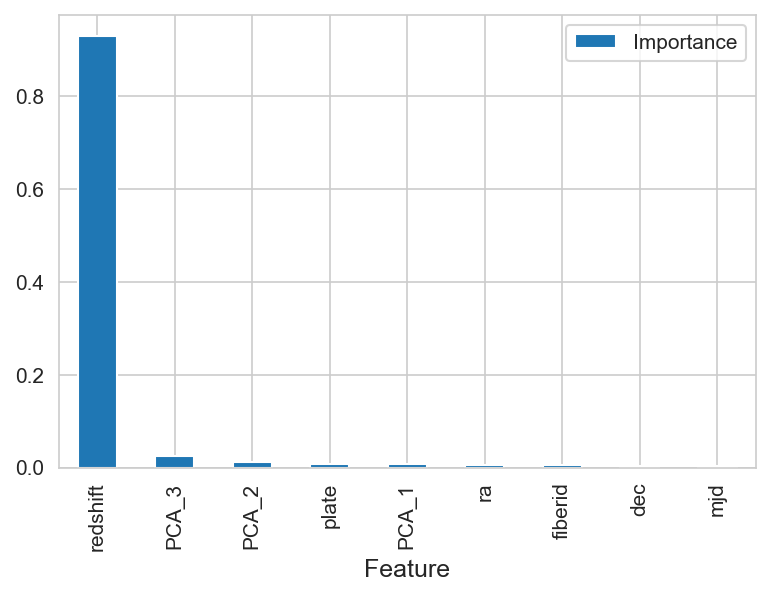

In [29]:
importances.plot.bar();

Here we can clearly see how PCA helped to improve the performance of our predictors as 2 of the principal components are in the top 3 features.

The best (in terms of being able to split classes) is redshift.

Mjd is the feature with the lowest importance during the classification process, we will therefore drop it from the dataframe.

Let's drop the column from the dataframe and rescale it. Since XGBoost requires the class to be discrete, we will re-add it manually afterwards.

In [30]:
scaler = MinMaxScaler()
sdss = pd.DataFrame(scaler.fit_transform(sdss_df_fe.drop(['mjd', 'class'], axis=1)), 
                    columns=sdss_df_fe.drop(['mjd', 'class'], axis=1).columns)
sdss['class'] = sdss_df_fe['class']

In [31]:
sdss.head()

,ra,dec,redshift,plate,fiberid,PCA_1,PCA_2,PCA_3,class
0,0.693832,0.074025,0.000770,0.373281,0.490490,0.385886,0.069348,0.387685,2
1,0.694098,0.074642,0.000762,0.006999,0.540541,0.448110,0.215264,0.415556,2
2,0.694422,0.074519,0.023749,0.002579,0.512513,0.518964,0.154511,0.490959,0
3,0.695175,0.073487,0.000751,0.373281,0.509510,0.388785,0.279638,0.452852,2
4,0.695225,0.074199,0.000882,0.373281,0.511512,0.417103,0.357613,0.353918,2


### Summary
We trained different machine learning models to solve this classification problems. Without any further hyperparameter tuning XGBoost and Scikit-Learn's Random Forest Classifier performed the best.

As XGBoost showed a little higher accuracy in most of the tests, we will continue only with this classifier.

#### XGBoost - Finding the best hyperparameters
Now it's time to look for the optimal hyperparameters - what does this mean?

We will test our chosen model with different values for (almost) each of its tuning parameters and give back the parameters with which the model performed best.

**The actual searching for optimal parameters is not done in this notebook since the operations can take some time and parallel editing would not be possible.

We will write our transformed data set to disk so the tuning scripts can access it.

In [32]:
sdss.to_csv('sdss_data.csv')

The best parameters for prediction as found by the tuning tests are:

    max_depth = 5
    min_child_weight = 1
    gamma = 0
    subsample = 0.8
    colsample_bytree = 0.8
    reg_alpha = 0.005

#### XGBoost - Testing optimal hyperparameters


The following model implements the best performing model with optimal parameters evaluated by the hyperparameter tuning. We will expect the model to perform even better than before.

Analytics Vidhya presented a really nice guide for tuning XGBoost.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(sdss.drop('class', axis=1), sdss['class'],
                                                   test_size=0.33,stratify=sdss['class'])

In [38]:
xgboost = XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=100, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)

xgboost.fit(X_train, y_train)
preds = xgboost.predict(X_test)

accuracy = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy WITH optimal hyperparameters is: %3.2f" % (accuracy))

C:\Users\Kian\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:18:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's prediction accuracy WITH optimal hyperparameters is: 99.36




The parameter tuning did not improve the accuracy as excpected. We will therefore do a cross validation to test to get a more reliable result.




In [42]:
xgb_cv = XGBClassifier(n_estimators=100, use_label_encoder=False)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring = "accuracy")

print()
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std());

[16:19:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:19:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:19:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:19:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

Depending on the run the cross validation results vary from a little lower and a little better than before.

This indicates that the parameter tuning was not as effective as expected - this could mean that XGBoost was actually close to its maximum performance capability on this data set.

As we still have a good performance we will now continue with further evaluation of the performance of our model!

### XGBoost - Evaluation

##### Confusion Matrix

In [43]:
unique, counts = np.unique(sdss['class'], return_counts=True)
dict(zip(unique, counts))

{0: 4998, 1: 850, 2: 4152}

In [44]:
predictions = cross_val_predict(xgb, sdss.drop('class', axis=1), sdss['class'], cv=3)
confusion_matrix(sdss['class'], predictions)

[16:22:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:22:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:22:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[4964.00, 26.00, 8.00],
       [25.00, 824.00, 1.00],
       [6.00, 0.00, 4146.00]], dtype=int64)

The first row shows that out of 4998 stars, **4964 were classified correctly as stars**. 26 stars were classified incorrectly as galaxies and 8 stars were classified incorrectly as quasars.

The second row shows out of 850 quasars **827 were classified correctly**. 25 qsos were classified incorrectly as stars and 1 quasar was classified as galaxy.

The last row tells us that out of 4152 galaxies **4147 were classified correctly**. 6 galaxies were classified incorrectly as star.

In total:

We have only 64 objects which were classified incorrectly. Most of the objects were recognized as what they are.

#### Precision & Recall

In [45]:
print("Precision:", precision_score(sdss['class'], predictions, average='micro'))
print("Recall:",recall_score(sdss['class'], predictions, average='micro'))

Precision: 0.9934
Recall: 0.9934


Precision is the fraction of events where the algorithm classified an object of type t correctly out of all occurences of the algorithm classifying objects of type t.

Recall is the fraction of events where the algorithm classified an object of type t correctly when the true type of that object was actually t.

Precision in our case:

For every class its calculated how many objects were classified as stars (or galaxies or quasars) in relation to the amount of correct star (or galaxies or quasars) predictions. The results are averaged --> 99.36%.

Recall in our case:

For every class its calculated how many objects were classified as stars (or galaxies or quasars) in relation to the total amount of predictions where the object actually was a star (or galaxy or quasar). The results are averaged --> 99.36%.

In both cases our algorithm did a very good job. The highest precision or recall value a predictor can have is 1.0.

### F1-Score

One can combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

In [46]:
print("F1-Score:", f1_score(sdss['class'], predictions, average='micro'))

F1-Score: 0.9934


As precision and recall have the same value the F1-Score has automatically the same value too. Again, we are very close to 1.0 which indicates strong performance.